# IPL MATCH ANALYSIS AND PREDICTION

This notebook looks into using python-based machine learning and data science libraries in an atempt to learn a machine learning model capable of predicting an outcome of the match

## 1.IMPORTING THE LIBRARIES

#### Regular EDA(exploratory data analysis) and plotting libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 2.DATA

### The data is retrieve from kaggle at https://www.kaggle.com/nowke9/ipldata

#### Loading the dataset

In [2]:
match_df = pd.read_csv('matches.csv')
match_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

## EXPLORATORY DATA ANALYSIS

In [4]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [5]:
### check for missing values

In [6]:
match_df[match_df['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [7]:
### Replacing the null values

In [8]:
match_df['winner'].fillna('Draw',inplace=True)

In [9]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [10]:
team_encodings = {
    "Mumbai Indians":1,
    "Kolkata Knight Riders":2,
    "Royal Challengers Bangalore":3,
    "Deccan Chargers":4,
    "Chennai Super Kings":5,
    "Rajasthan Royals":6,
    "Delhi Daredevils":7,
    "Gujarat Lions":8,
    "Kings XI Punjab":9,
    "Sunrisers Hyderabad":10,
    "Rising Pune Supergiant":11,
    "Rising Pune Supergiants":11,
    "Kochi Tuskers Kerala":12,
    "Pune Warriors":13,
    "Delhi Capitals":14,
    "Draw":15
}

team_encode_dict = {
    "team1":team_encodings,
    "team2":team_encodings,
    "toss_winner":team_encodings,
    "winner":team_encodings
}

In [11]:
match_df.replace(team_encode_dict,inplace=True)

In [12]:
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
## missing value in city coloumn

In [14]:
match_df[match_df['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [15]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    int64 
 5   team2            756 non-null    int64 
 6   toss_winner      756 non-null    int64 
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    int64 
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [16]:
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,5.554233,5.604497,5.462963,0.025132,5.416667,13.283069,3.350529
std,3464.478148,3.366895,3.389656,3.411850,3.361638,0.156630,3.421736,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,8.000000,8.000000,0.000000,8.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


In [17]:
### Toss wins and Match wins

<AxesSubplot:>

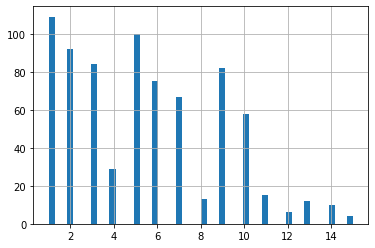

In [18]:
match_df['winner'].hist(bins=50)

<AxesSubplot:title={'center':'Matches won'}, xlabel='Team', ylabel='Count of match wins'>

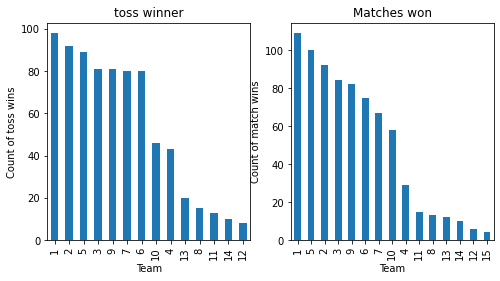

In [19]:
toss_wins = match_df['toss_winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winner")
toss_wins.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Team')
ax2.set_ylabel('Count of match wins')
ax2.set_title("Matches won")
match_wins.plot(kind="bar")



In [20]:
match_df.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [21]:
## Dropping the reduntant columns

In [22]:
match_df = match_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [23]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city','toss_decision','venue']
encoder = LabelEncoder()
l = []
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)
    l.append(list(encoder.classes_))
match_df.head()
print(l)

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

In [48]:
city_dict ={}
c=0
for s in l[0]:
    city_dict[s.lower()] = c
    c+=1
print(city_dict)

{'abu dhabi': 0, 'ahmedabad': 1, 'bangalore': 2, 'bengaluru': 3, 'bloemfontein': 4, 'cape town': 5, 'centurion': 6, 'chandigarh': 7, 'chennai': 8, 'cuttack': 9, 'delhi': 10, 'dharamsala': 11, 'dubai': 12, 'durban': 13, 'east london': 14, 'hyderabad': 15, 'indore': 16, 'jaipur': 17, 'johannesburg': 18, 'kanpur': 19, 'kimberley': 20, 'kochi': 21, 'kolkata': 22, 'mohali': 23, 'mumbai': 24, 'nagpur': 25, 'port elizabeth': 26, 'pune': 27, 'raipur': 28, 'rajkot': 29, 'ranchi': 30, 'sharjah': 31, 'visakhapatnam': 32}


In [42]:
venue_dict ={}
c=0
for s in l[2]:
    venue_dict[s.lower()] = c
    c+=1
print(venue_dict)

{'aca-vdca stadium': 0, 'barabati stadium': 1, 'brabourne stadium': 2, 'buffalo park': 3, 'de beers diamond oval': 4, 'dr dy patil sports academy': 5, 'dr. y.s. rajasekhara reddy aca-vdca cricket stadium': 6, 'dubai international cricket stadium': 7, 'eden gardens': 8, 'feroz shah kotla': 9, 'feroz shah kotla ground': 10, 'green park': 11, 'himachal pradesh cricket association stadium': 12, 'holkar cricket stadium': 13, 'is bindra stadium': 14, 'jsca international stadium complex': 15, 'kingsmead': 16, 'm chinnaswamy stadium': 17, 'm. a. chidambaram stadium': 18, 'm. chinnaswamy stadium': 19, 'ma chidambaram stadium, chepauk': 20, 'maharashtra cricket association stadium': 21, 'nehru stadium': 22, 'new wanderers stadium': 23, 'newlands': 24, 'outsurance oval': 25, 'punjab cricket association is bindra stadium, mohali': 26, 'punjab cricket association stadium, mohali': 27, 'rajiv gandhi international stadium, uppal': 28, 'rajiv gandhi intl. cricket stadium': 29, 'sardar patel stadium, m

In [24]:
## Machine Learning Modelling 

In [25]:
from sklearn.model_selection import train_test_split

train_df,test_df = train_test_split(match_df,test_size=0.2,random_state=5)

print(train_df.shape)
print(test_df.shape)

(604, 7)
(152, 7)


In [26]:
### Importing scikit learn models

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [28]:
def print_model_scores(model, data, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        predictors: independent feature variable
        target: target variable
    '''
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")

In [29]:
## Logistic Regression 

In [30]:
target_var=['winner']
predictor_var = ['team1','team2','venue', 'toss_winner', 'city', 'toss_decision']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy : 32.12%
Cross-Validation Score :[3.60211141 3.74165739 3.45932683 3.33526115 3.63776488]
Average RMSE: 3.555224332732571


In [31]:
## Random Forest Classifier

In [32]:
model = RandomForestClassifier(n_estimators=100)
target_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
print_model_scores(model, match_df,predictor_var, target_var)

Accuracy : 88.10%
Cross-Validation Score :[2.84466259 3.21420687 3.54255118 3.68368517 3.61838572]
Average RMSE: 3.380698307663122


In [33]:
## Sample

In [47]:
print("Name Of The Team 1")
team1=input()
print("Name Of The Team 2")
team2=input()
print("Who won the toss")
toss_winner=input()
print(f"What did {toss_winner} decides    1:Fielding  0:Batting")
toss_desc = input()
print("Location")
city = str(city_dict[input()])
print("Stadium")
venue = str(venue_dict[input()])
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],venue,team_encode_dict['toss_winner'][toss_winner],city,toss_desc]
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(team_encodings.keys())[list(team_encode_dict['team1'].values()).index(output)]}")


Name Of The Team 1
Mumbai Indians
Name Of The Team 2
Sunrisers Hyderabad
Who won the toss
Sunrisers Hyderabad
What did Sunrisers Hyderabad decides    1:Fielding  0:Batting
0
Location
mumbai
Stadium
wankhede stadium
[['1' '10' '40' '10' '24' '0']]
The winner would be: Mumbai Indians
